In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


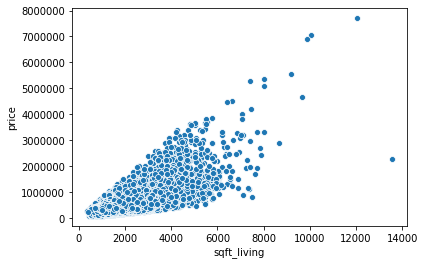

In [4]:
sns.scatterplot('sqft_living','price',data=data)

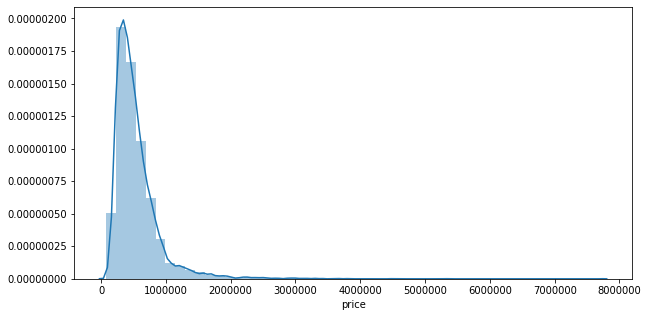

In [5]:
plt.figure(figsize=(10,5))
sns.distplot(data['price'])

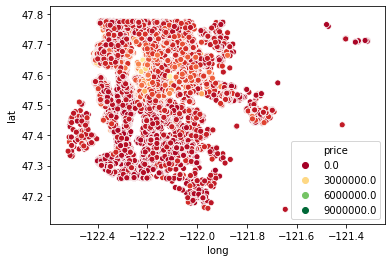

In [6]:
sns.scatterplot('long','lat',data=data,hue='price',palette='RdYlGn')

In [7]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
data=data.drop('id',axis=1)

In [9]:
data=data.drop('date',axis=1)

In [10]:
data=data.drop('zipcode',axis=1)

In [11]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [12]:
#why values?
X=data.drop('price',axis=1).values

In [13]:
y=data['price'].values

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler=MinMaxScaler()

In [18]:
X_train=scaler.fit_transform(X_train)

In [19]:
X_test=scaler.fit_transform(X_test)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
model=Sequential()

In [22]:
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))
##remmber this 
model.compile(optimizer='adam',loss='mse')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 2s 104us/sample - loss: 429351739894.3474 - val_loss: 420880847121.0667
Epoch 2/400
15117/15117 [==============================] - 0s 23us/sample - loss: 427705156558.3478 - val_loss: 415278421495.1506
Epoch 3/400
15117/15117 [==============================] - 0s 27us/sample - loss: 407389947322.3989 - val_loss: 368715049561.7579
Epoch 4/400
15117/15117 [==============================] - 0s 26us/sample - loss: 316082287189.4519 - val_loss: 225000341544.4543
Epoch 5/400
15117/15117 [==============================] - 0s 24us/sample - loss: 162017881333.2804 - val_loss: 99498477340.4444
Epoch 6/400
15117/15117 [==============================] - 0s 22us/sample - loss: 99270623841.9157 - val_loss: 88727415001.4420
Epoch 7/400
15117/15117 [==============================] - 0s 27us/sample - loss: 95078895235.8526 - val_loss: 87150908089.8370
Epoch 8/400
15117/15117 [====================

15117/15117 [==============================] - 0s 23us/sample - loss: 38015382995.2589 - val_loss: 36208371565.3531
Epoch 65/400
15117/15117 [==============================] - 0s 23us/sample - loss: 37781550930.6915 - val_loss: 36238988679.9012
Epoch 66/400
15117/15117 [==============================] - 0s 24us/sample - loss: 37600111949.8821 - val_loss: 36001378996.7803
Epoch 67/400
15117/15117 [==============================] - 0s 25us/sample - loss: 37439786702.0938 - val_loss: 35718086982.1630
Epoch 68/400
15117/15117 [==============================] - 0s 25us/sample - loss: 37152921551.3639 - val_loss: 35408541630.2617
Epoch 69/400
15117/15117 [==============================] - 0s 24us/sample - loss: 36974335685.4233 - val_loss: 34322070975.5259
Epoch 70/400
15117/15117 [==============================] - 0s 24us/sample - loss: 36837399377.8448 - val_loss: 35133255020.0889
Epoch 71/400
15117/15117 [==============================] - 0s 23us/sample - loss: 36719907666.3867 - val_loss

15117/15117 [==============================] - 0s 23us/sample - loss: 33170484996.8264 - val_loss: 37797555657.6395
Epoch 128/400
15117/15117 [==============================] - 0s 23us/sample - loss: 33152346350.8453 - val_loss: 37721961697.0272
Epoch 129/400
15117/15117 [==============================] - 0s 22us/sample - loss: 33063014876.0648 - val_loss: 36884961108.0691
Epoch 130/400
15117/15117 [==============================] - 0s 22us/sample - loss: 33032236911.5819 - val_loss: 37435732534.3605
Epoch 131/400
15117/15117 [==============================] - 0s 23us/sample - loss: 33017002305.0796 - val_loss: 36387450040.5728
Epoch 132/400
15117/15117 [==============================] - 0s 23us/sample - loss: 32966626550.4320 - val_loss: 36596785232.9086
Epoch 133/400
15117/15117 [==============================] - 0s 23us/sample - loss: 32955540735.9831 - val_loss: 38012051011.0025
Epoch 134/400
15117/15117 [==============================] - 0s 23us/sample - loss: 32939933383.9974 - v

15117/15117 [==============================] - 0s 26us/sample - loss: 31783149270.0869 - val_loss: 39811649465.2049
Epoch 191/400
15117/15117 [==============================] - 0s 22us/sample - loss: 31770873844.0781 - val_loss: 38940923544.9679
Epoch 192/400
15117/15117 [==============================] - 0s 22us/sample - loss: 31751830163.4324 - val_loss: 38681493463.5457
Epoch 193/400
15117/15117 [==============================] - 0s 27us/sample - loss: 31740239725.8207 - val_loss: 38277575414.5185
Epoch 194/400
15117/15117 [==============================] - 0s 24us/sample - loss: 31716100438.4849 - val_loss: 38290697643.2988
Epoch 195/400
15117/15117 [==============================] - 0s 26us/sample - loss: 31714869909.3968 - val_loss: 39199481613.2741
Epoch 196/400
15117/15117 [==============================] - 0s 22us/sample - loss: 31714741516.3114 - val_loss: 38582199809.2642
Epoch 197/400
15117/15117 [==============================] - 0s 22us/sample - loss: 31681465265.3897 - v

15117/15117 [==============================] - 1s 36us/sample - loss: 30894397022.4611 - val_loss: 38958233782.0444
Epoch 254/400
15117/15117 [==============================] - 0s 32us/sample - loss: 30849127493.5672 - val_loss: 36736357995.4568
Epoch 255/400
15117/15117 [==============================] - 0s 27us/sample - loss: 30853536397.8102 - val_loss: 38284813966.8543
Epoch 256/400
15117/15117 [==============================] - 0s 27us/sample - loss: 30870325453.9922 - val_loss: 37674006174.0247
Epoch 257/400
15117/15117 [==============================] - 0s 26us/sample - loss: 30853773944.1339 - val_loss: 37704493071.1704
Epoch 258/400
15117/15117 [==============================] - 0s 26us/sample - loss: 30839112471.8608 - val_loss: 38877113417.3235
Epoch 259/400
15117/15117 [==============================] - 0s 26us/sample - loss: 30777568145.7898 - val_loss: 37070963224.0198
Epoch 260/400
15117/15117 [==============================] - 0s 23us/sample - loss: 30752934303.7777 - v

In [ ]:
losses=pd.DataFrame(model.history.history)

In [ ]:
losses.plot()

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
predictions=model.predict(X_test)

In [ ]:
mean_absolute_error(y_test,predictions)

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')